##Import packages


Import packages that we nedd to use in this project

In [40]:
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix
import networkx as nx

###Download the dataset form skitlearn 

In [3]:
dataset = fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


###Get the key of dataset

In [4]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

###Get the shape of dataset of each keys

In [5]:
print(dataset.data.shape)
print(dataset.images.shape)
print(dataset.target.shape)


(400, 4096)
(400, 64, 64)
(400,)


###Print the discription of dataset

In [6]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

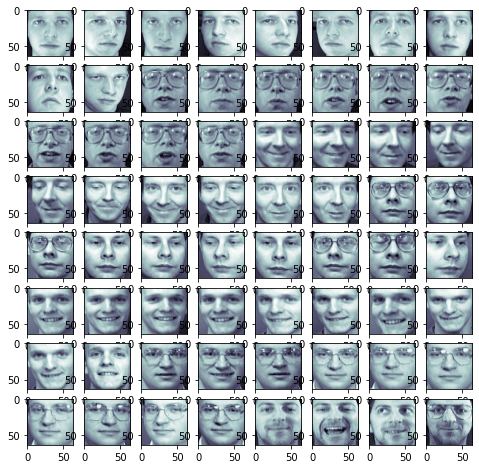

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)            # Subplot
    ax.imshow(dataset.images[i],cmap = plt.cm.bone)
plt.show()


In [15]:
X = dataset.data
true_labels = dataset.target

###Kmeans clustring

In [13]:
kmeans = KMeans(n_clusters=40)
kmeans.fit(X)

KMeans(n_clusters=40)

###Kmeans evaluation
 

In [18]:
print("evaluation by normalized mutual info score",normalized_mutual_info_score (true_labels, kmeans.labels_))
print("evaluation by adjustedrand score",adjusted_rand_score(true_labels, kmeans.labels_))
print("evaluation by adjusted mutual info score",adjusted_mutual_info_score(true_labels, kmeans.labels_))



evaluation by normalized mutual info score 0.789081808515091
evaluation by adjustedrand score 0.4527245698644658
evaluation by adjusted mutual info score 0.6523963439034616


###Dbscan clustring 

In [20]:
dbscan = DBSCAN(eps=7.5, min_samples=3).fit(X)


###Dbscan evaluation

In [21]:
print("evaluation by normalized mutual info score",normalized_mutual_info_score (true_labels, dbscan.labels_))
print("evaluation by adjustedrand score",adjusted_rand_score(true_labels, dbscan.labels_))
print("evaluation by adjusted mutual info score",adjusted_mutual_info_score(true_labels, dbscan.labels_))

evaluation by normalized mutual info score 0.645150373185517
evaluation by adjustedrand score 0.08394775062785827
evaluation by adjusted mutual info score 0.49011618309750354


###Spectral clustering _ K_Neighbors

In [34]:
Specteral = SpectralClustering(n_neighbors=5)
Specteral.fit(X)
Specteral.labels_

array([0, 6, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
print("evaluation by normalized mutual info score",normalized_mutual_info_score (true_labels, Specteral.labels_))
print("evaluation by adjustedrand score",adjusted_rand_score(true_labels, Specteral.labels_))
print("evaluation by adjusted mutual info score",adjusted_mutual_info_score(true_labels, Specteral.labels_))

evaluation by normalized mutual info score 0.054560468139167255
evaluation by adjustedrand score 0.00036949509563968303
evaluation by adjusted mutual info score 0.0094330953589566


thats awefu!!!

###Hierarchical Clustering

In [28]:

Hierarchical = AgglomerativeClustering(n_clusters=40, affinity='l2', linkage='complete')

Hierarchical.fit(X)

AgglomerativeClustering(affinity='l2', linkage='complete', n_clusters=40)

In [36]:
print("evaluation by normalized mutual info score",normalized_mutual_info_score (true_labels, Hierarchical.labels_))
print("evaluation by adjustedrand score",adjusted_rand_score(true_labels, Hierarchical.labels_))
print("evaluation by adjusted mutual info score",adjusted_mutual_info_score(true_labels, Hierarchical.labels_))

evaluation by normalized mutual info score 0.7510724338565746
evaluation by adjustedrand score 0.35902719240735537
evaluation by adjusted mutual info score 0.5998612409081894


###Rbf formula

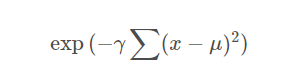

In [39]:
distance = distance_matrix(X,X)**2
W_rbf = np.zeros((X.shape[0],X.shape[0]))
gamma = 1/np.mean(distance)
delta = 0.4232
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if np.exp(-1*(gamma)*distance[i][j]) > delta:
            W_rbf[i][j] = np.exp(-1*(gamma)*distance[i][j])
            if i==j:
                W_rbf[i][j] = 0
            

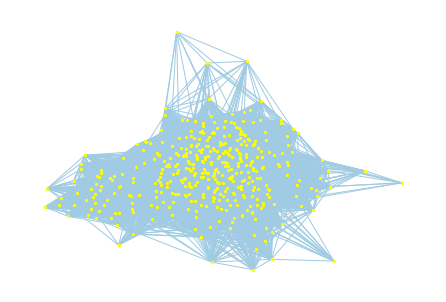

In [43]:
G =  nx.Graph()
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if W_rbf[i][j] !=0 :
            G.add_edge(i,j)
nx.draw(G, edge_color='#A0CBE2', node_color='yellow', node_size = 5)

In [44]:
N = []
K = 5
for i in range(X.shape[0]):
    sorted_d = np.sort(distance[i])
    knn_distance = sorted_d[:K+1]
    index = []
    for _d in knn_distance:
        if _d == 0:
            continue
        for j in range(X.shape[0]):
            if distance[i][j] == _d:
                index.append(j)
    N.append(index)
Wbar = np.zeros((X.shape[0],X.shape[0]))

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if j in N[i]:
            Wbar[i][j] = np.exp(-1*gamma*distance[i][j])

W_knn = np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        W_knn[i][j] = (Wbar[i][j] + Wbar[j][i])/2
        

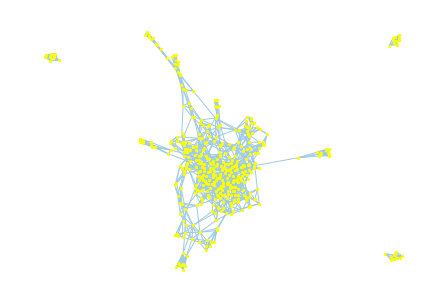

In [45]:
G =  nx.Graph()
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if W_knn[i][j] !=0 :
            G.add_edge(i,j)
nx.draw(G, edge_color='#A0CBE2', node_color='yellow', node_size = 5)